In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
file_path = 'train'
root = 'train'
for file in os.listdir(root):
    df = pd.read_csv(root+"/"+file)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [33]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

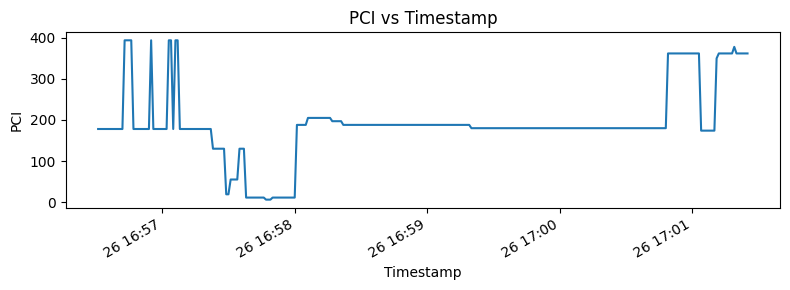

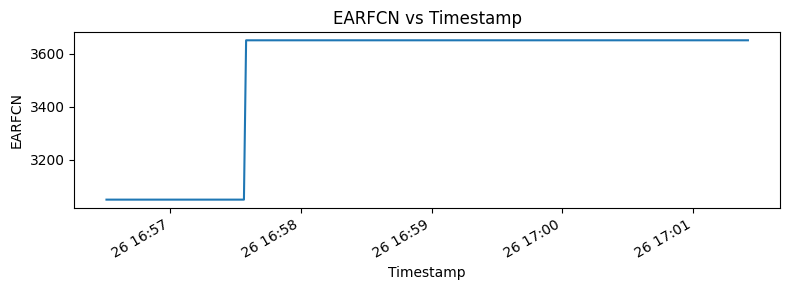

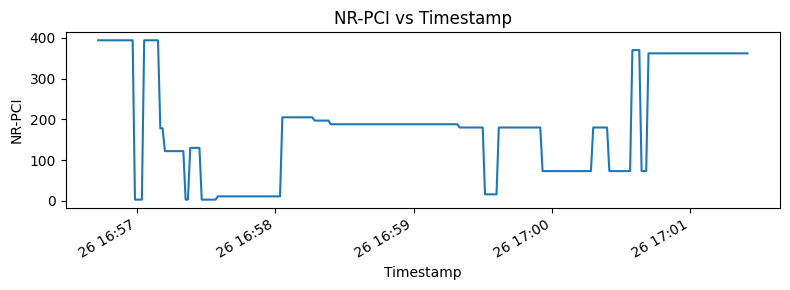

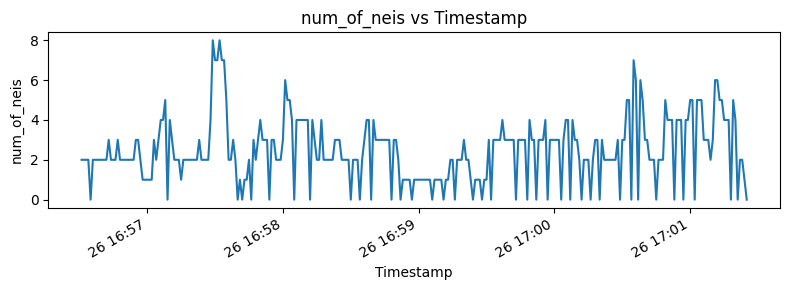

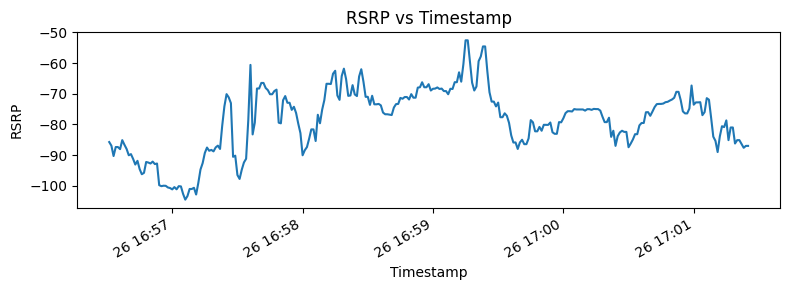

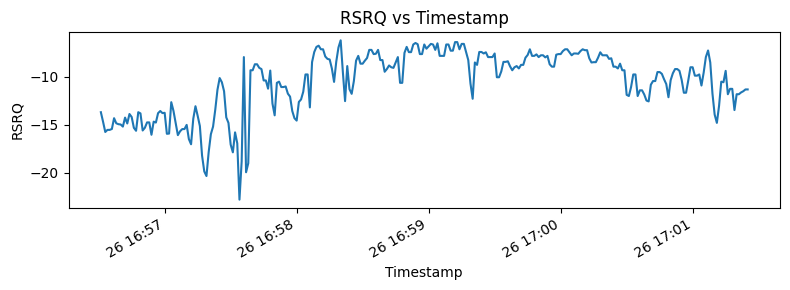

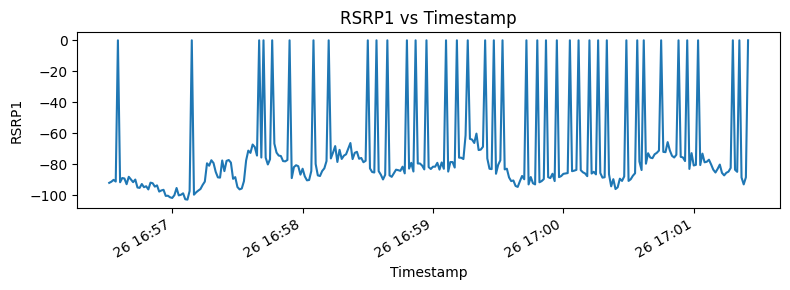

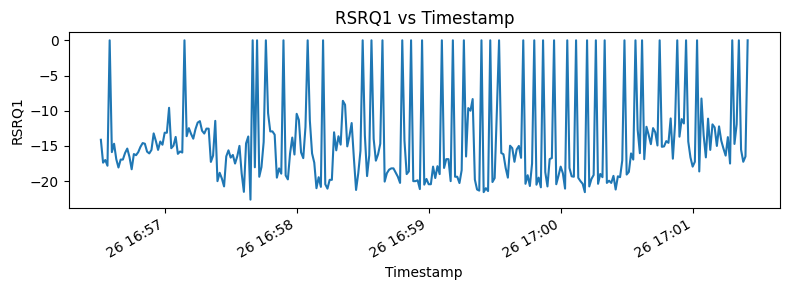

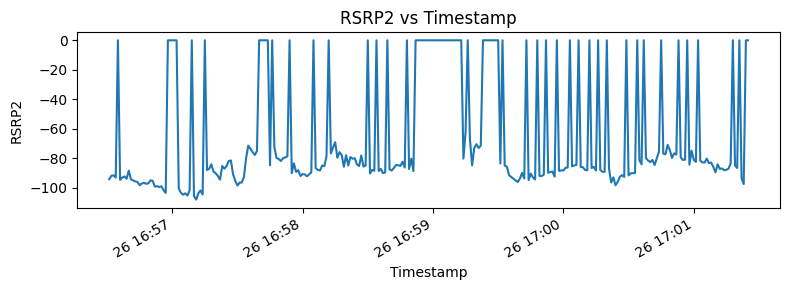

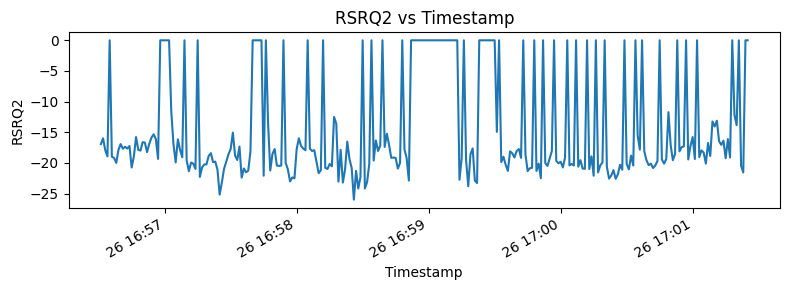

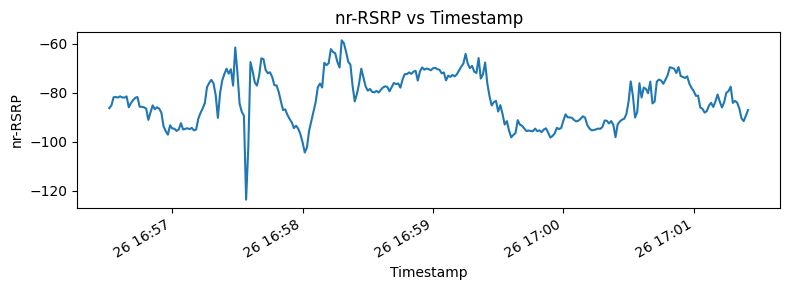

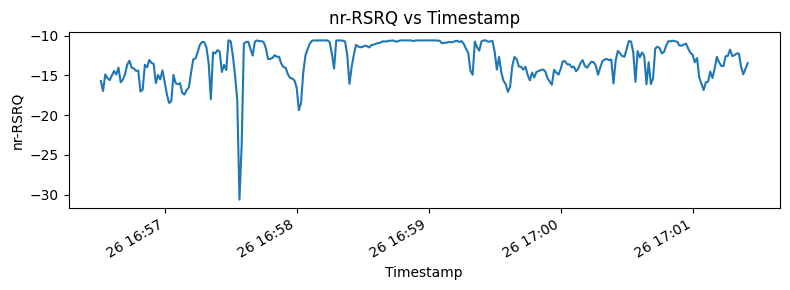

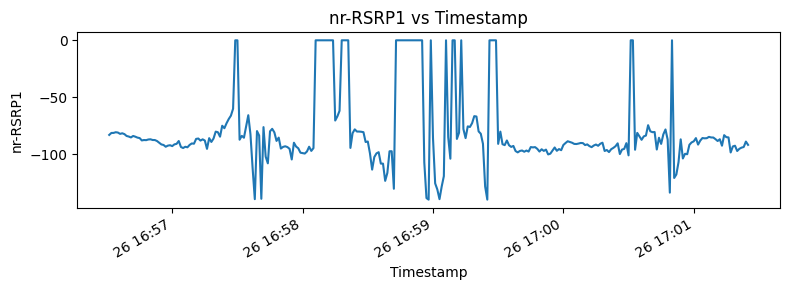

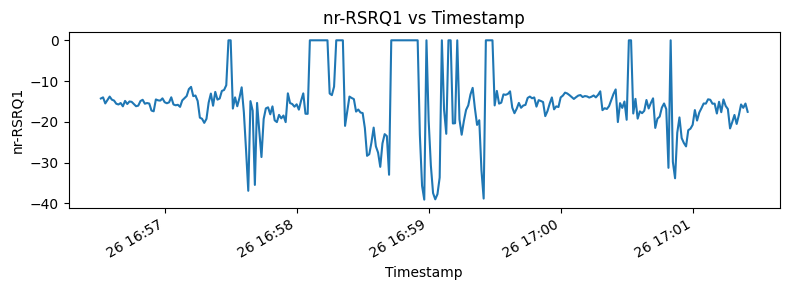

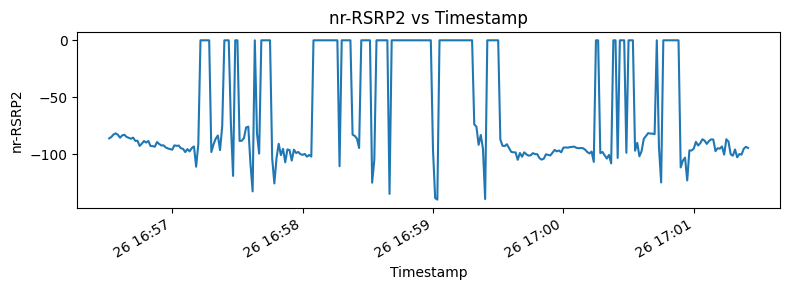

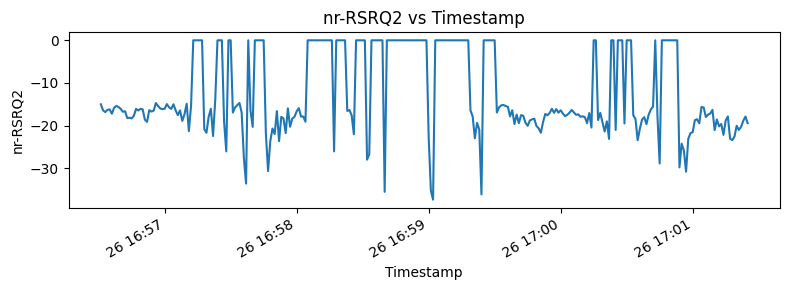

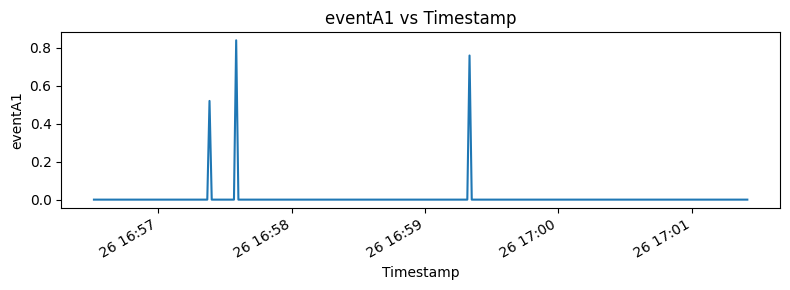

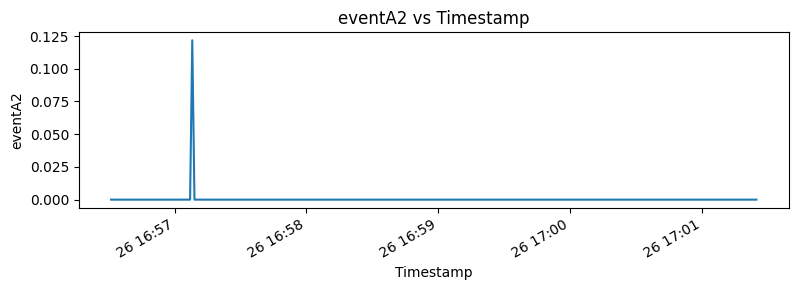

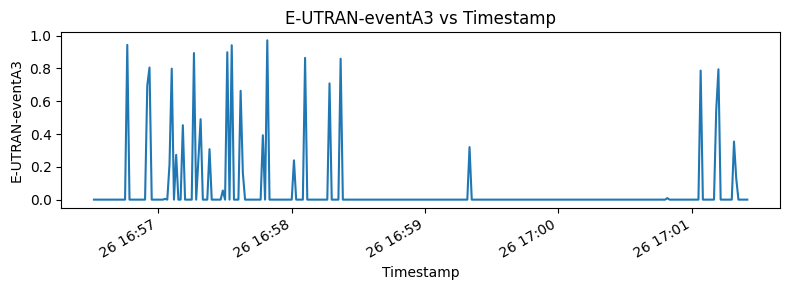

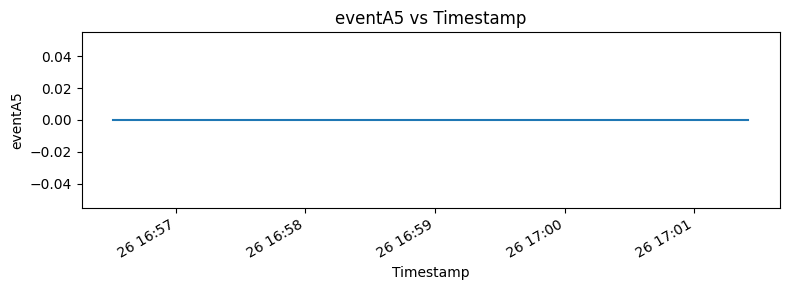

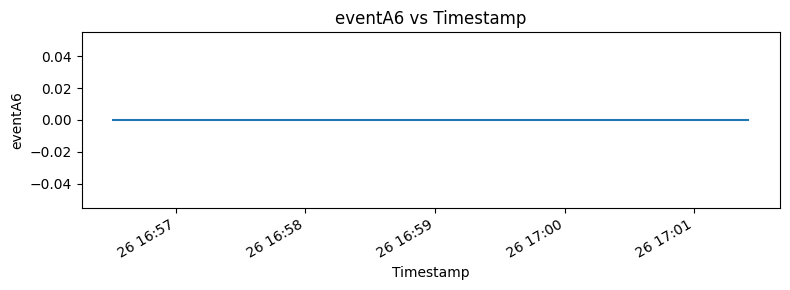

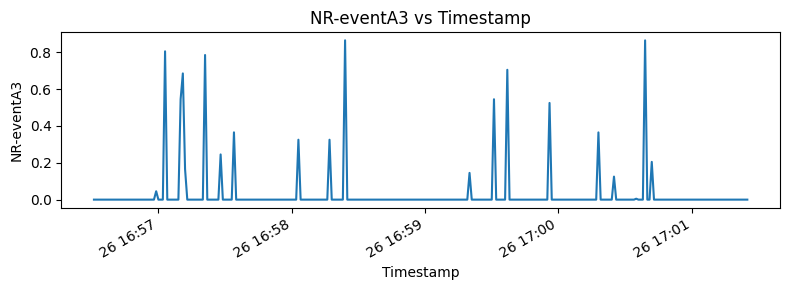

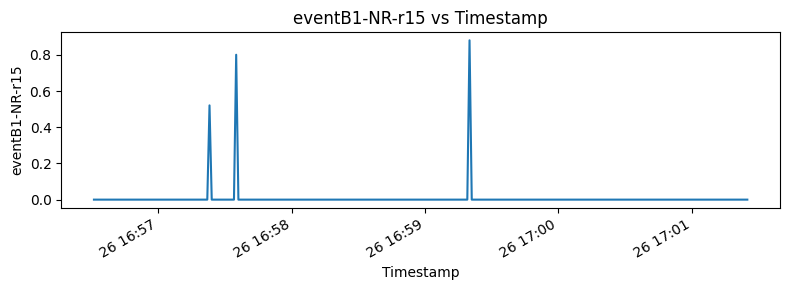

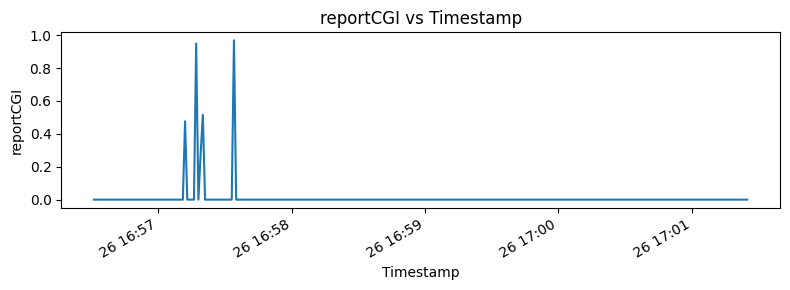

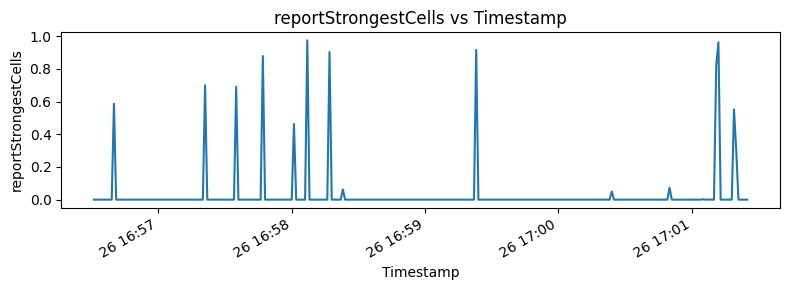

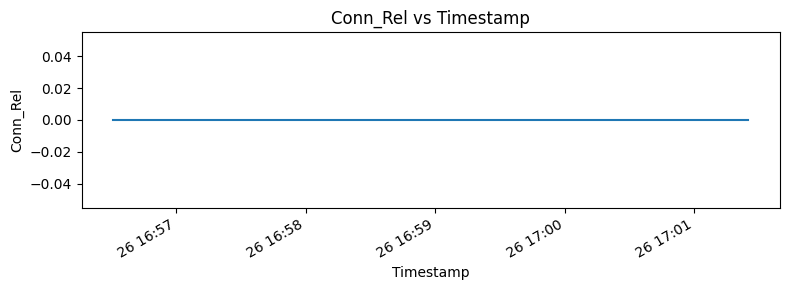

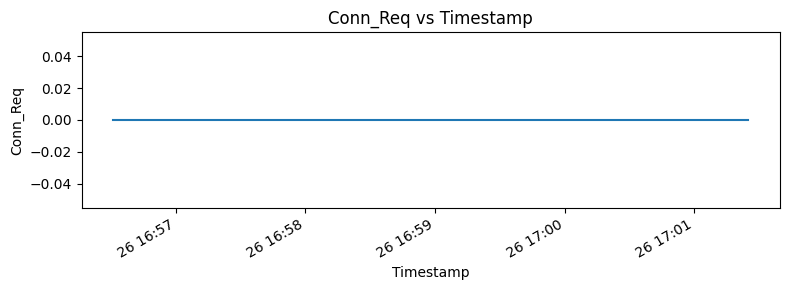

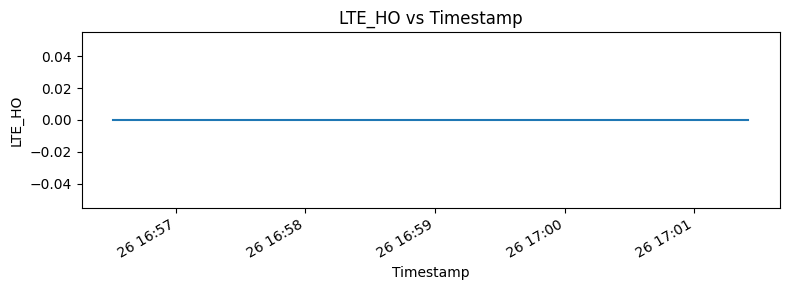

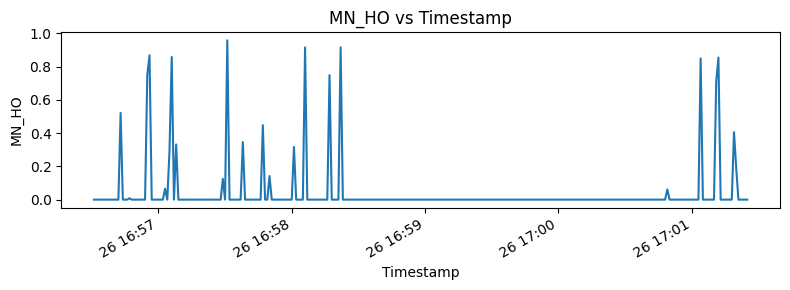

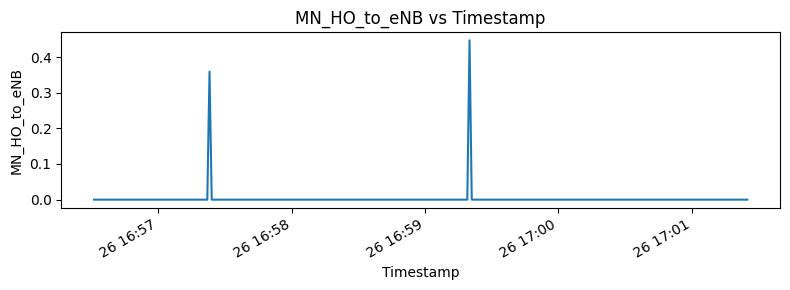

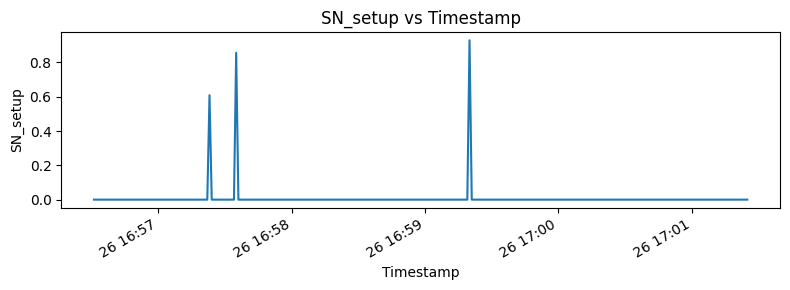

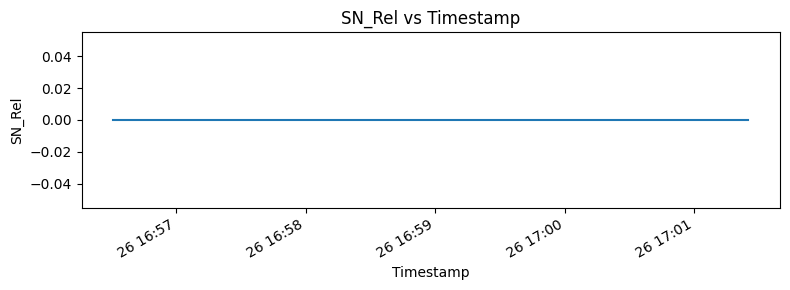

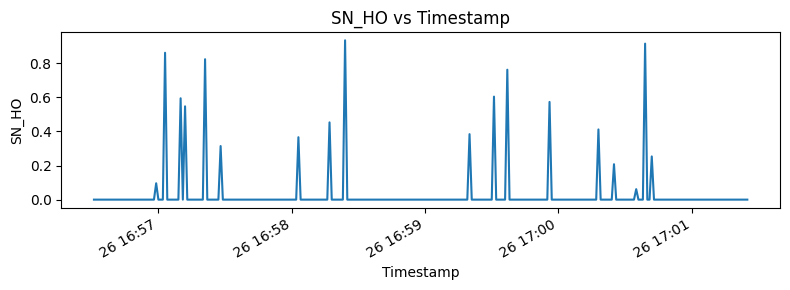

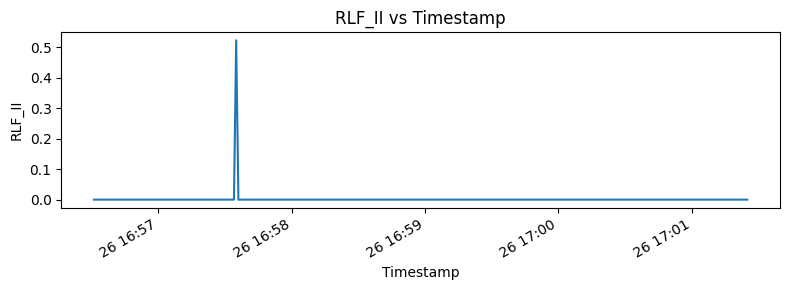

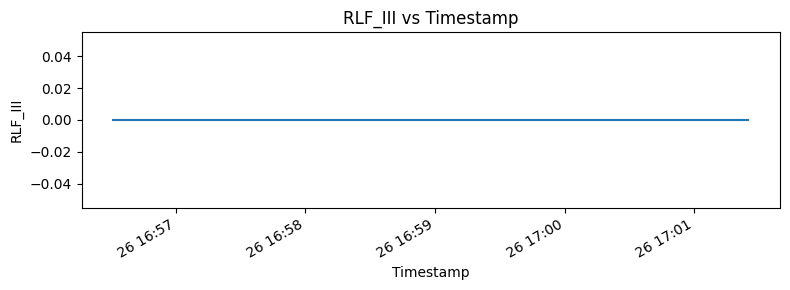

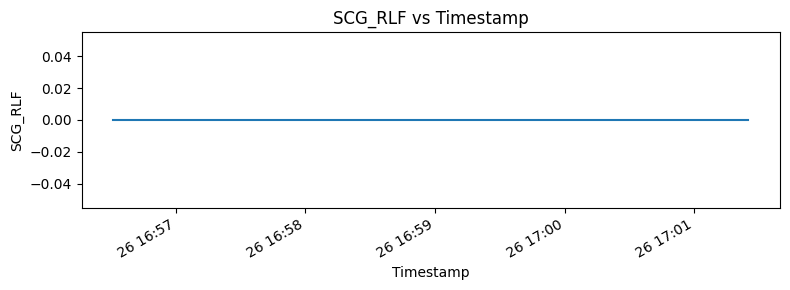

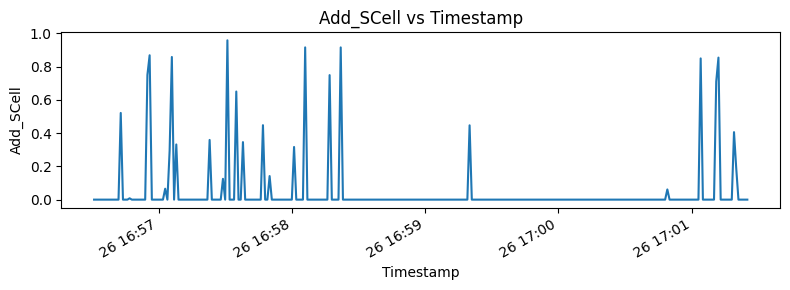

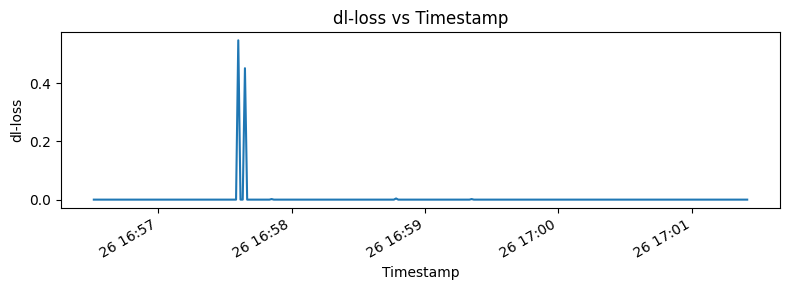

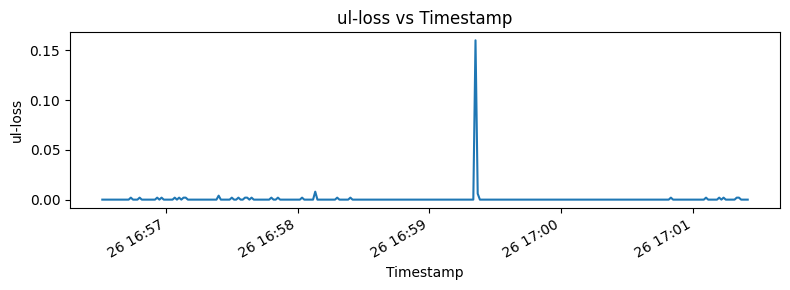

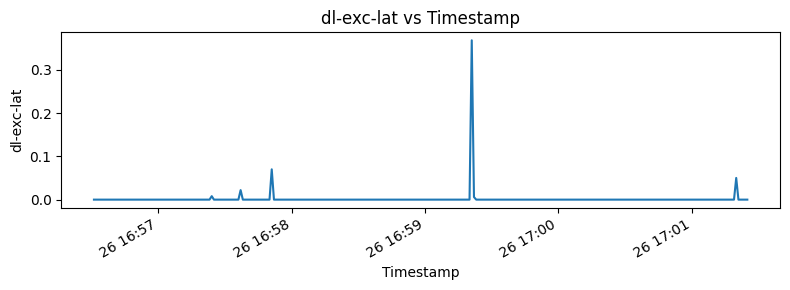

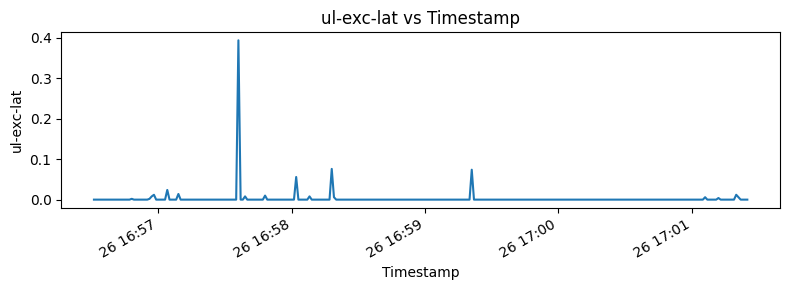

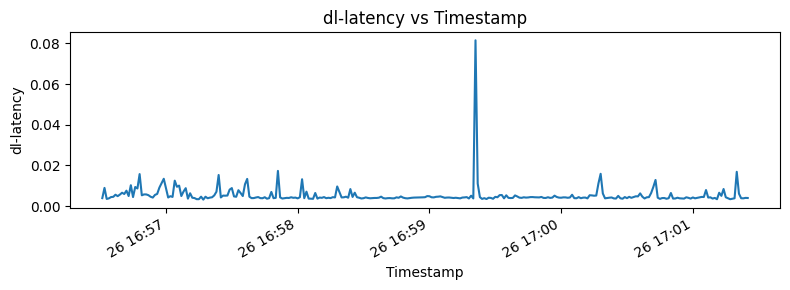

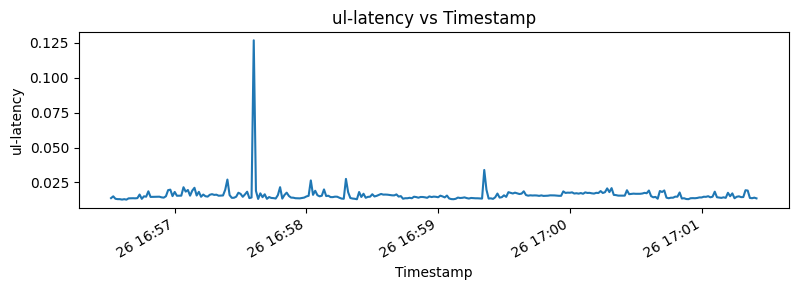

In [34]:
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    plt.plot(df['Timestamp'], df[col])
    plt.title(f"{col} vs Timestamp")
    plt.xlabel("Timestamp")
    plt.ylabel(col)
    plt.gcf().autofmt_xdate()  # 自動格式化 x 軸日期顯示
    plt.tight_layout()
    plt.show()

In [12]:
for col in numeric_cols:
    corr = df['dl-latency'].corr(df[col])
    if corr > 0.1:
        print(col)
        print(f"Pearson 相關係數：{corr:.3f}")
    


num_of_neis
Pearson 相關係數：0.113
ul-loss
Pearson 相關係數：0.385
dl-exc-lat
Pearson 相關係數：0.774
ul-exc-lat
Pearson 相關係數：0.248
dl-latency
Pearson 相關係數：1.000
ul-latency
Pearson 相關係數：0.366


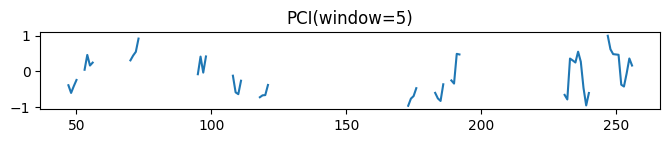

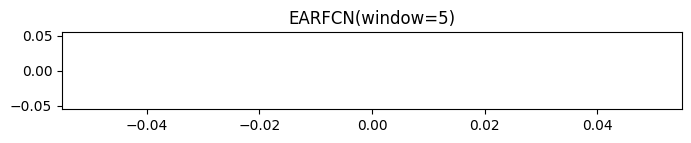

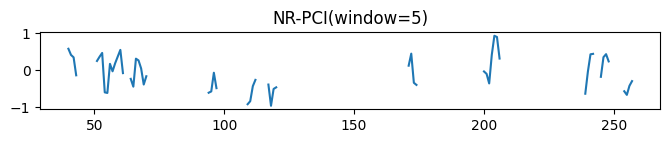

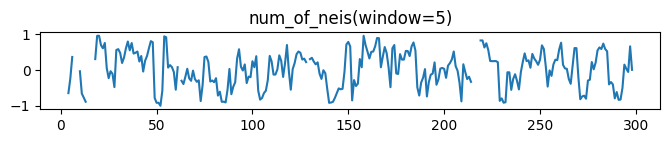

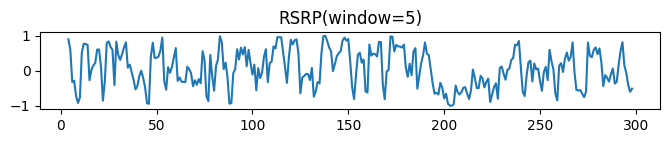

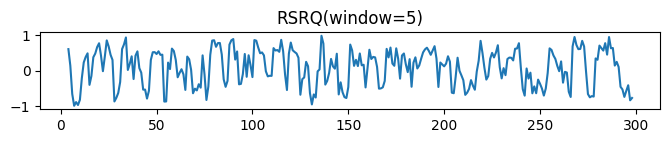

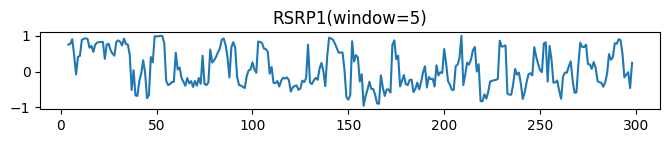

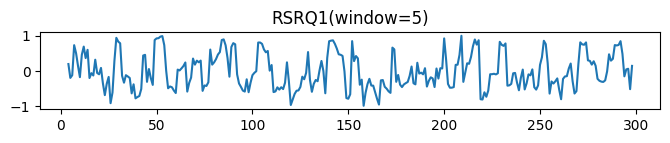

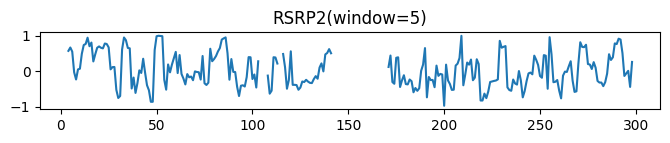

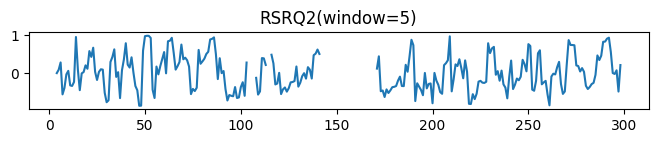

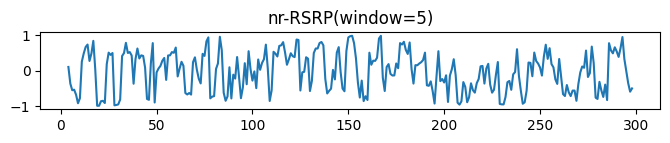

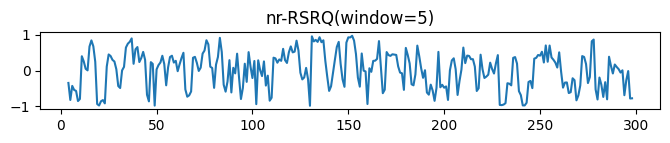

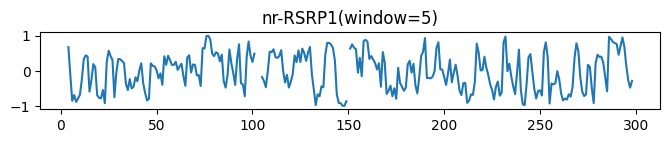

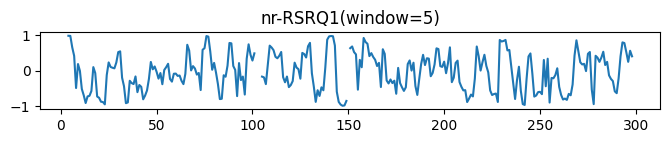

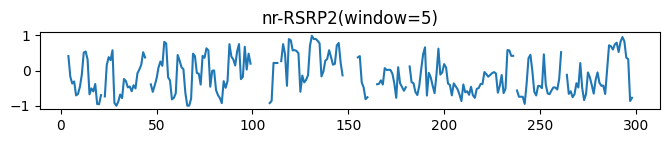

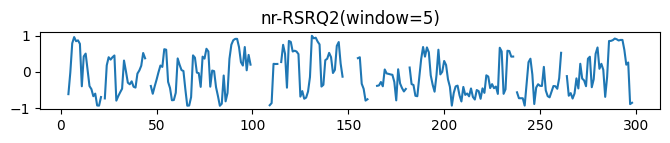

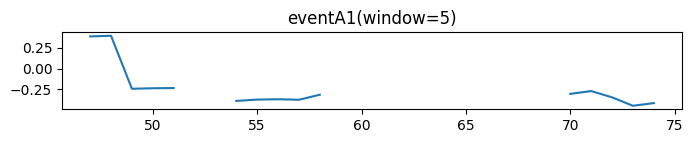

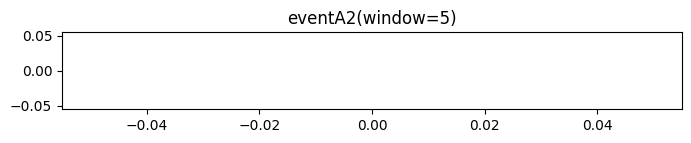

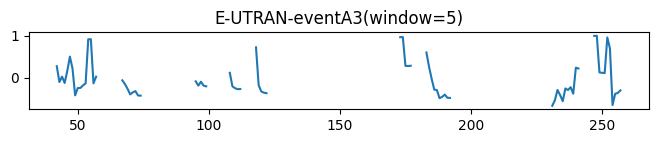

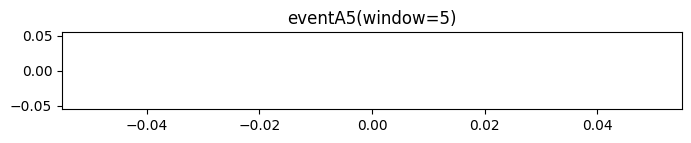

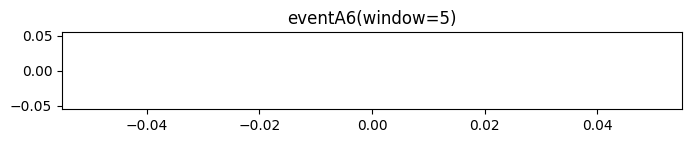

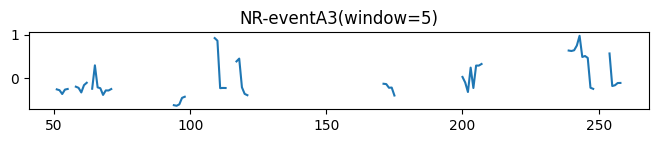

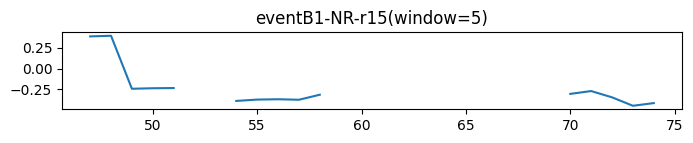

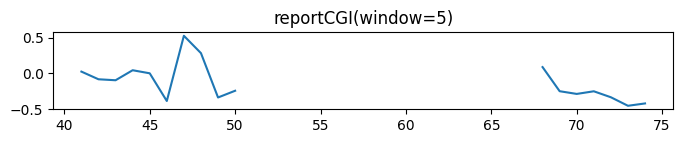

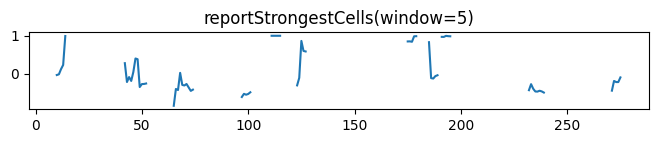

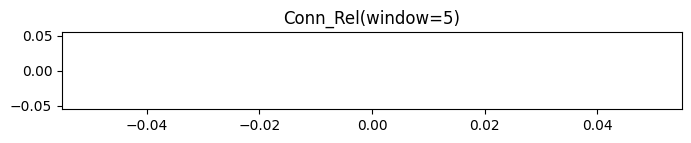

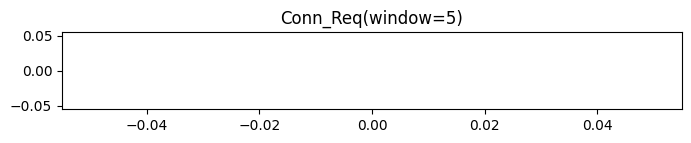

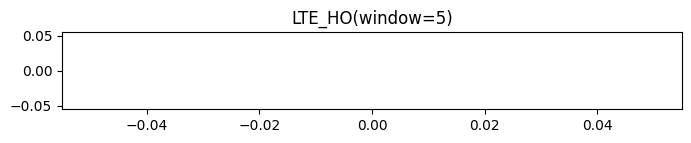

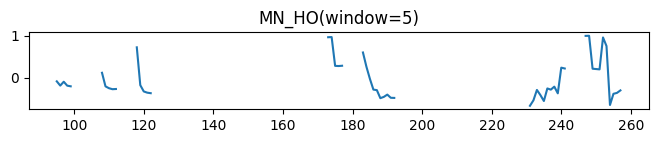

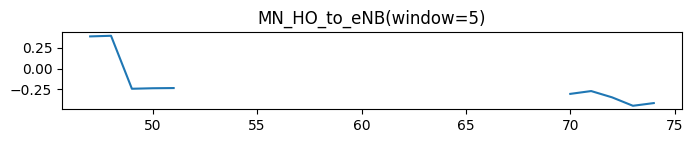

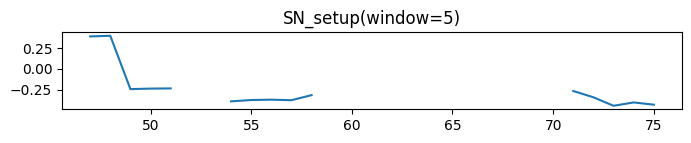

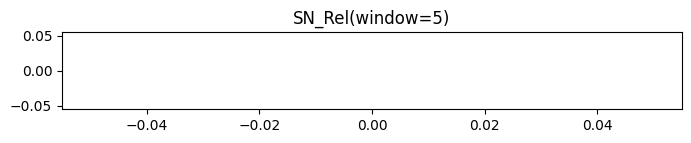

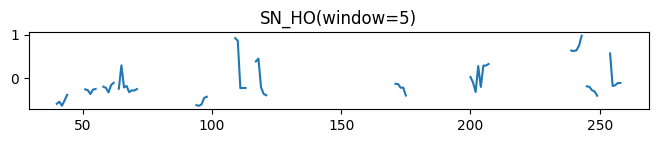

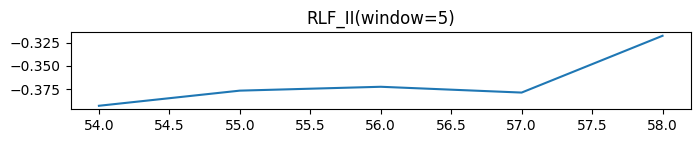

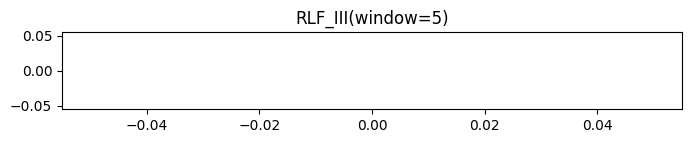

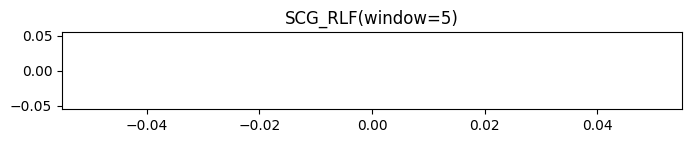

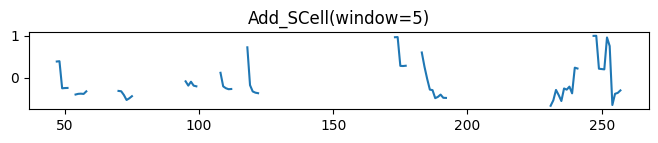

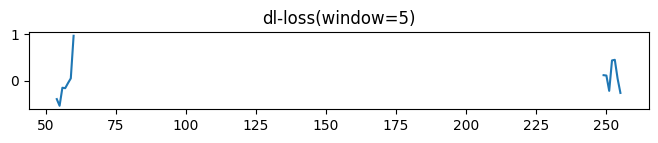

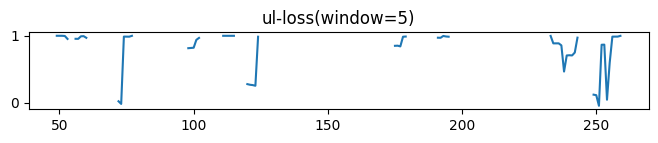

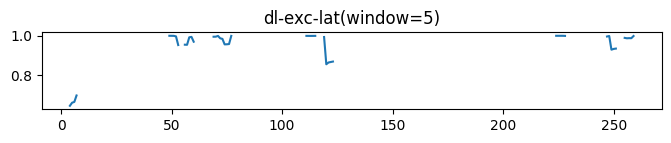

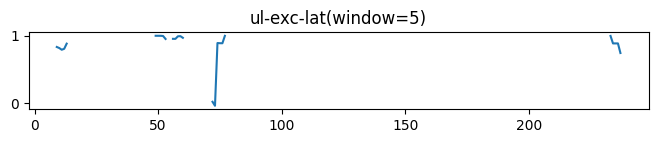

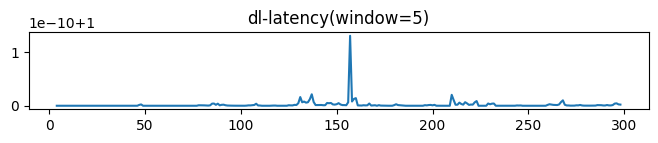

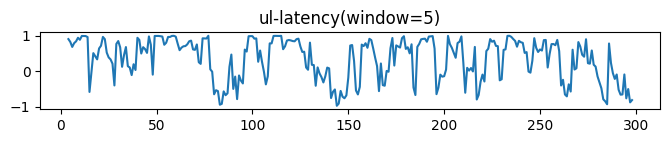

In [26]:
window = 5  # 以 30 個樣本為一個視窗
for col in numeric_cols:
    rolling_corr = df['dl-latency'].rolling(window).corr(df[col])
    rolling_corr.plot(figsize=(8,1))
    plt.title(f"{col}(window={window})")
    plt.show()

In [37]:
import pandas as pd
import os

folder_path = './train2'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

print(combined_df)

                 Timestamp    PCI  EARFCN  NR-PCI  num_of_neis       RSRP  \
0      2023-04-01 15:51:12  378.0  3050.0   350.0            2 -94.656250   
1      2023-04-01 15:51:13  378.0  3050.0   362.0            2 -92.979167   
2      2023-04-01 15:51:14  378.0  3050.0   362.0            2 -92.812500   
3      2023-04-01 15:51:15  378.0  3050.0   362.0            2 -92.937500   
4      2023-04-01 15:51:16  378.0  3050.0   362.0            2 -93.812500   
...                    ...    ...     ...     ...          ...        ...   
11571  2023-04-01 15:26:20  362.0   525.0     NaN            2 -78.950000   
11572  2023-04-01 15:26:21  362.0   525.0     NaN            2 -77.087500   
11573  2023-04-01 15:26:22  362.0   525.0     NaN            2 -78.337500   
11574  2023-04-01 15:26:23  362.0   525.0     NaN            3 -78.800000   
11575  2023-04-01 15:26:24  362.0   525.0     NaN            3 -77.287500   

            RSRQ      RSRP1      RSRQ1      RSRP2  ...  RLF_III  SCG_RLF  \

In [39]:
import catboost
#print(catboost.__version__)

All: 173
B1: 18
B1B3: 14
B3: 90
B1B8: 8
B7: 151
B8: 212
LTE: 121
LTEb3: 15
LTEb7: 16
total: 843
Mean Squared Error: 0.0004877647082006673
R^2: 0.6501405985853606
Root Mean Squared Error (RMS): 0.022085395812633
       Actual  Predicted
0       0.000   0.000451
1       0.000   0.005707
2       0.000   0.000088
3       0.002   0.000897
4       0.000   0.004549
...       ...        ...
77562   0.000   0.004949
77563   0.000   0.006190
77564   0.000   0.000009
77565   0.000   0.002322
77566   0.000   0.000061

[77567 rows x 2 columns]


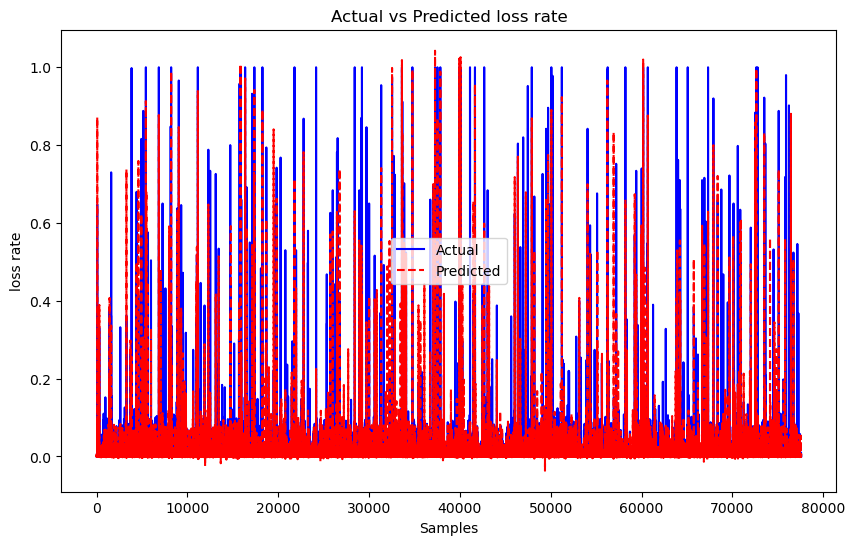

In [ ]:
import pandas as pd
import numpy as np
import os 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

folder_path = 'vv3'
section = ['2023-03-26','2023-05-15','2023-05-24','2023-05-26','2023-06-12','2023-06-13','2023-06-15','2023-06-24','2023-08-16','2023-08-21','2023-08-29','2023-09-12','2023-09-21']
x = section[6]

csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
#csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith(x)]
All = 0
B1 = 0
B1B3 =0
B3 = 0
B1B8 = 0
B7 =0 
B8 =0
B7B8 = 0
B3B8 = 0
LTE = 0
LTEb3 = 0
LTEb7 = 0
l =[]
for file in csv_files:
    if file.endswith('All.csv'):
       # continue
        All +=1
        continue

    l+=[file]
    if file.endswith('B1.csv'):
        B1 +=1
    if file.endswith('B1B3.csv'):
        B1B3 +=1
    elif file.endswith('B3.csv'):
        B3 +=1
    if file.endswith('B1B8.csv'):
        B1B8 +=1
    elif file.endswith('B8.csv'):
        B8 +=1
    if file.endswith('B7.csv'):
        B7 +=1

    if file.endswith('LTE.csv'):
        LTE +=1
    if file.endswith('LTEb3.csv'):
        LTEb3 +=1
    if file.endswith('LTEb7.csv'):
        LTEb7 +=1
print("All:",All)
print("B1:",B1)
print("B1B3:",B1B3)
print("B3:",B3)
print("B1B8:",B1B8)
print("B7:",B7)
print("B8:",B8)
print("LTE:",LTE)
print("LTEb3:",LTEb3)
print("LTEb7:",LTEb7)
print("total:",len(csv_files))
data_list = []
for file in l:#csv_files:
    df = pd.read_csv(file)
    data_list.append(df)


data = pd.concat(data_list, ignore_index=True)



data.fillna(method='ffill', inplace=True)


window_size = 10 

def create_features(data, window_size):
    features = []
    labels = []
    for i in range(window_size, len(data)):
        feature_window = data.iloc[i-window_size:i] 
        label = data.iloc[i]['ul-loss']  
        feature = feature_window[['RSRP', 'RSRQ','RSRP1','RSRQ1','RSRP2','RSRQ2','LTE_HO','eventA1','eventA2','E-UTRAN-eventA3','eventA5','eventA6','NR-eventA3','eventB1-NR-r15','MN_HO','MN_HO_to_eNB','SN_HO'	,'RLF_II'	,'RLF_III','reportStrongestCells','ul-loss']].values.flatten()
        features.append(feature)
        labels.append(label)
    return np.array(features), np.array(labels)


X, y = create_features(data, window_size)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, random_state=42, verbose=0)


catboost_model.fit(X_train, y_train)


# predict
#y_pred = model.predict(X_test)
y_pred = catboost_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')


rms = np.sqrt(mse)
print(f'Root Mean Squared Error (RMS): {rms}')

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)



plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')  # Display first 50 samples for better visualization
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('loss rate')
plt.title('Actual vs Predicted loss rate')
plt.legend()
plt.show()